<a href="https://colab.research.google.com/github/ayamlearning/machine-learning-zoomcamp/blob/main/L4_Model_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
data = 'wget wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
!wget $data

--2023-10-08 09:19:14--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2023-10-08 09:19:14--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2023-10-08 09:19:14--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.4’

data.csv.4          100%[===================>]   1.41M  --.-KB/s    in 0.03s   

2023-10-08 09:19:15 (54.8 MB/s) - ‘data.csv.4’ saved [1475504/1475504]

FINISHED --2023-10-08 09:19:15--
Total wall clock time: 0.1s
Downloaded: 1 files, 1.4M in 0.03s (54.8 M

In [264]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [265]:
data = pd.read_csv('data.csv')
data.sample(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8023,Mitsubishi,Raider,2008,regular unleaded,210.0,6.0,AUTOMATIC,four wheel drive,4.0,NaN,Compact,Crew Cab Pickup,18,14,436,28780
7691,Toyota,Prius,2015,regular unleaded,134.0,4.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Hybrid",Compact,4dr Hatchback,48,51,2031,25765
11766,Cadillac,XTS,2015,regular unleaded,304.0,6.0,AUTOMATIC,front wheel drive,4.0,"Luxury,Performance",Large,Sedan,28,18,1624,44660
10965,Toyota,Tundra,2015,regular unleaded,381.0,8.0,AUTOMATIC,four wheel drive,2.0,NaN,Large,Regular Cab Pickup,17,13,2031,32170
122,Mazda,2,2014,regular unleaded,100.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,35,29,586,16210


In [266]:
len(data)

11914

## Initial data preparation

In [267]:
columns = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type',
           'Vehicle Style','highway MPG', 'city mpg','MSRP']
df = data[columns]

In [268]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [269]:
df.sample(5).T

,6211,4465,9745,7238,4724
Make,Dodge,Ford,Hyundai,Dodge,Honda
Model,Journey,F-150 Heritage,Sonata,Nitro,Fit
Year,2017,2004,2017,2009,2017
Engine HP,283.0,231.0,245.0,210.0,130.0
Engine Cylinders,6.0,8.0,4.0,6.0,4.0
Transmission Type,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC,AUTOMATIC
Vehicle Style,4dr SUV,Extended Cab Pickup,Sedan,4dr SUV,4dr Hatchback
highway MPG,25,17,31,21,37
city mpg,17,13,22,15,32
MSRP,31795,29275,26600,23900,18700


In [270]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Vehicle Style         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object

In [271]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.columns

<ipython-input-271-6bf00c6cf40d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower().str.replace(' ', '_')


Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [272]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [273]:
categorical_cols = ["make", "model", "transmission_type", "vehicle_style"]
numerical_cols = [x for x in df.columns if (x not in categorical_cols)]
target_col = numerical_cols[-1]
numerical_cols = numerical_cols[:-1]

In [274]:
df['engine_hp'] = df['engine_hp'].fillna(0)
df['engine_cylinders'] = df['engine_cylinders'].fillna(0)

<ipython-input-274-d1826c9363d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_hp'] = df['engine_hp'].fillna(0)
<ipython-input-274-d1826c9363d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_cylinders'] = df['engine_cylinders'].fillna(0)


In [275]:
def greater_than_mean(price):
  return (price >= df['msrp'].mean()).astype('int')

In [276]:
df['above_average'] = df['msrp'].apply(greater_than_mean)
df.sample(5)

del df['msrp']

<ipython-input-276-491f650d3ef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_average'] = df['msrp'].apply(greater_than_mean)


In [277]:
df.sample(5)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
3473,dodge,dakota,2010,210.0,6.0,automatic,extended_cab_pickup,20,15,0
7379,mitsubishi,outlander_sport,2017,148.0,4.0,manual,4dr_suv,29,23,0
8839,mercedes-benz,s-class,2017,621.0,12.0,automatic,sedan,22,13,1
7950,infiniti,qx80,2014,400.0,8.0,automatic,4dr_suv,20,14,1
3102,honda,crosstour,2013,278.0,6.0,automatic,4dr_hatchback,30,20,0


In [278]:
from sklearn.model_selection import train_test_split

In [279]:
df.shape

(11914, 10)

In [287]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train.above_average.values
y_val = df_val.above_average.values

del df_train['above_average']
del df_val['above_average']

print(df_train.shape[0], df_val.shape[0], df_test.shape[0] )

7148 2383 2383


## Feature Importance

Question 1

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [289]:
t = 0.5
results_dict = {}

for n in numerical_cols:
  model = LogisticRegression(solver='liblinear', random_state=1)
  model.fit(df_train[[n]], y_train)
  y_pred = model.predict_proba(df_val[[n]])[:, 1]

  results_dict[n] = roc_auc_score(y_val, y_pred >= t)

print(results_dict)

{'year': 0.5, 'engine_hp': 0.7966431604770571, 'engine_cylinders': 0.6923457196272261, 'highway_mpg': 0.5, 'city_mpg': 0.5022935779816514}


## Train Model

In [290]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [291]:
def train_model(features):
  train_dict = df_train[features].to_dict(orient='records')

  dv = DictVectorizer(sparse=False)
  dv.fit(train_dict)
  X_train = dv.transform(train_dict)

  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
  model.fit(X_train, y_train)

  val_dict = df_val[features].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  y_pred_prob = model.predict_proba(X_val)[:, 1]
  y_pred = model.predict(X_val)

  auc_score_thresh = roc_auc_score(y_val, y_pred_prob >= t)
  auc_score_normal = roc_auc_score(y_val, y_pred)


  return {"auc_score_thresh":round(auc_score_thresh,3),
          "auc_score_normal":round(auc_score_normal,3)
  }

In [292]:
train_model(categorical_cols + numerical_cols)

{'auc_score_thresh': 0.912, 'auc_score_normal': 0.912}

## Model Metrics

In [293]:
lst_threshs = np.arange(0.0, 1.0, 0.01)
dict_results = {}
features = categorical_cols + numerical_cols

for t in lst_threshs:
    train_dict = df_train[features].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dict = df_val[features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]

    true_positive = ((y_pred >= t) & (y_val == 1)).sum()
    false_positive = ((y_pred >= t) & (y_val == 0)).sum()
    false_negative = ((y_pred < t) & (y_val == 1)).sum()
    true_negative = ((y_pred < t) & (y_val == 0)).sum()

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)

    dict_results[t]={
        "threshold": t,
         "precision": precision,
         "recall": recall
    }

In [294]:
pd.DataFrame(dict_results).T.sample(5)

,threshold,precision,recall
0.66,0.66,0.928972,0.759939
0.83,0.83,0.978571,0.628440
0.39,0.39,0.837838,0.900612
0.70,0.70,0.931559,0.749235
0.47,0.47,0.868182,0.876147


In [295]:
df_scores = pd.DataFrame(dict_results).T
#df_scores = df_scores.rename_axis('threshold').reset_index()
df_scores.head()

,threshold,precision,recall
0.00,0.00,0.274444,1.000000
0.01,0.01,0.437290,0.996942
0.02,0.02,0.489106,0.995413
0.03,0.03,0.523733,0.995413
0.04,0.04,0.544845,0.993884


In [296]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

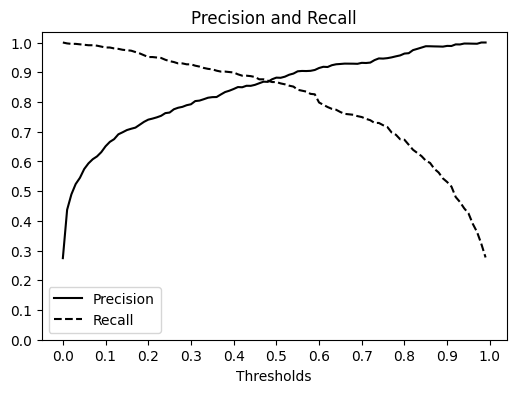

In [297]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.precision, color='black', linestyle='solid', label='Precision')
plt.plot(df_scores.threshold, df_scores.recall, color='black', linestyle='dashed', label='Recall')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('Precision and Recall')

plt.show()

In [298]:
def f1_score(p,r):
  return 2 * ((p*r)/(p+r))

In [299]:
df_scores['f1_score'] = df_scores[['precision','recall']].apply(lambda x: f1_score(*x), axis=1)
df_scores.head(5)


,threshold,precision,recall,f1_score
0.00,0.00,0.274444,1.000000,0.430688
0.01,0.01,0.437290,0.996942,0.607925
0.02,0.02,0.489106,0.995413,0.655919
0.03,0.03,0.523733,0.995413,0.686347
0.04,0.04,0.544845,0.993884,0.703844


In [300]:
df_scores.loc[df_scores["f1_score"].idxmax()]

threshold    0.500000
precision    0.881804
recall       0.866972
f1_score     0.874325
Name: 0.5, dtype: float64

## Cross Validation

In [301]:
from sklearn.model_selection import KFold

In [302]:
def train(df, y):
    cat = df[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[features].to_dict(orient='records')

    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [303]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


In [304]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.above_average.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [305]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.980 ± 0.002


## Hyper-Parameter Tuning

In [306]:
def train(df, y, C=1.0):
    cat = df[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    return dv, model

In [307]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.01, auc = 0.952 ± 0.003
C=0.1, auc = 0.972 ± 0.002
C=0.5, auc = 0.980 ± 0.003
C=10, auc = 0.981 ± 0.003
